In [11]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [12]:
h_d = pd.read_csv("data/heart-disease.csv")
h_d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
pf = pd.DataFrame(h_d["age"])

# Import LinearSVS 

In [15]:
from sklearn.svm import LinearSVC

# Make the data
x = h_d.drop("target", axis=1)
y = h_d["target"]

# Split the data correctly
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the LinearSVC model
model = LinearSVC()

# Fit the model
model.fit(x_train, y_train)

# Evaluate the model
model.score(x_test, y_test)

C:\Users\PLASS\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\PLASS\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.819672131147541

In [16]:
h_d["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

# Try the same thing using RandomForestClassifier

In [18]:
# Split the data correctly
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the LinearSVC model
model = RandomForestClassifier(n_estimators=100)

# Fit the model
model.fit(x_train, y_train)

# Evaluate the model


RandomForestClassifier()

In [19]:
model.score(x_train, y_train)

1.0

In [20]:
model.score(x_test, y_test)

0.8360655737704918

# Evaluate a machine learning model using a scoring parameter


In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x, y)

array([0.85245902, 0.90163934, 0.78688525, 0.8       , 0.73333333])

In [23]:
model.score(x_test, y_test), np.mean(cross_val_score(model, x , y ))

(0.8360655737704918, 0.8281967213114754)

In [24]:
val_score = cross_val_score(model, x, y)

In [25]:
print(f"Heart Disease: {np.mean(val_score) * 100 : 2f} %")

Heart Disease:  81.830601 %


# AUC/ROC

In [27]:
# True positive = model predicts 1 when TRUTH is 1
# False positive = model predicts 1 when TRUTH is 0
# True negative = model predicts 0 when TRUTH is 0
# False negative = model predicts 0 when TRUTH is 1

from sklearn.metrics import roc_curve


model.fit(x_train, y_train)

# Make predictions with probability 
y_probs = model.predict_proba(x_test)

# Keep 
y_probs[:10]

array([[0.91, 0.09],
       [0.41, 0.59],
       [0.36, 0.64],
       [0.84, 0.16],
       [0.14, 0.86],
       [0.14, 0.86],
       [0.35, 0.65],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.43, 0.57]])

In [28]:
print(model.classes_)

[0 1]


In [29]:
y_probs_postive = y_probs[: , 1]
y_probs_postive[:10]

array([0.09, 0.59, 0.64, 0.16, 0.86, 0.86, 0.65, 0.01, 0.01, 0.57])

In [30]:
# Calculate fpr, tpr and thresholds 
fpr, tpr, thresholds = roc_curve(y_test, y_probs_postive)

#check the false positive 
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.03448276, 0.06896552, 0.06896552, 0.06896552, 0.10344828,
       0.13793103, 0.13793103, 0.17241379, 0.17241379, 0.20689655,
       0.20689655, 0.34482759, 0.4137931 , 0.48275862, 0.51724138,
       0.62068966, 0.65517241, 0.72413793, 0.86206897, 0.96551724,
       1.        ])

# Create a function for plotting ROC curve

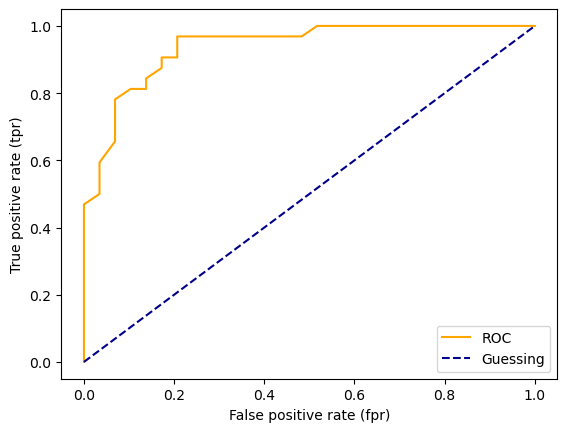

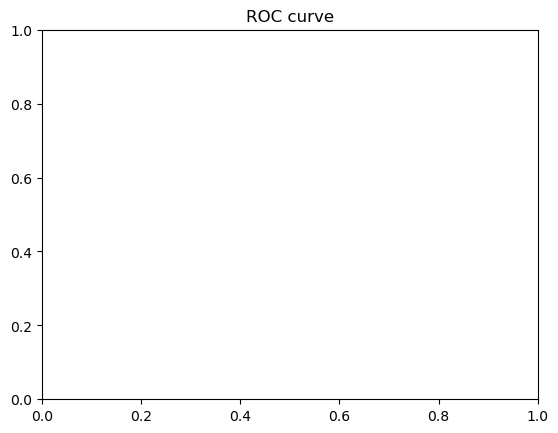

In [32]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    # plot the false positive result (fpr) and then true positive (tpr)

    # plot the curve here 
    plt.plot(fpr, tpr, color = "orange", label = "ROC")

    # plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = "darkblue", linestyle = "--", label = "Guessing")

    # customize the plot 
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.legend()
    plt.show()
    plt.title("ROC curve")
plot_roc_curve(fpr, tpr)

# Check the accuarcy 

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_postive)

0.9385775862068965

In [35]:
# Perfect AUC score 
roc_auc_score(y_test, y_test)

1.0

# Confusion metrics 

In [37]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [38]:
pd.crosstab(y_test,
           y_preds,
           rownames = ["Actual Labels"],
           colnames = ["Pred Labels"])

Pred Labels,0,1
Actual Labels,,
0,24,5
1,4,28


# Make the conf/matrix with Seaborn

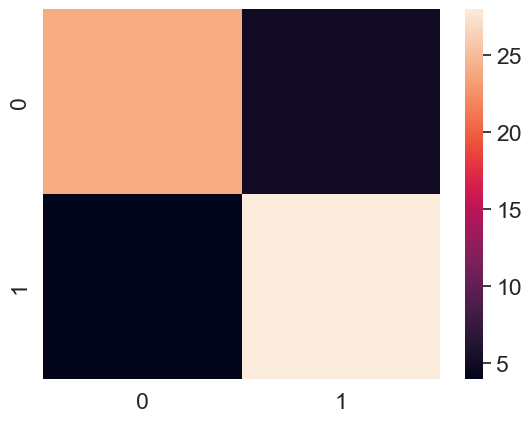

In [40]:
import seaborn as sns

# Set the font scale 
sns.set(font_scale = 1.5)

# Create a conf/matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

# Creating a con/mat using Sklearn 

In [42]:
import sklearn
sklearn.__version__

'1.4.2'

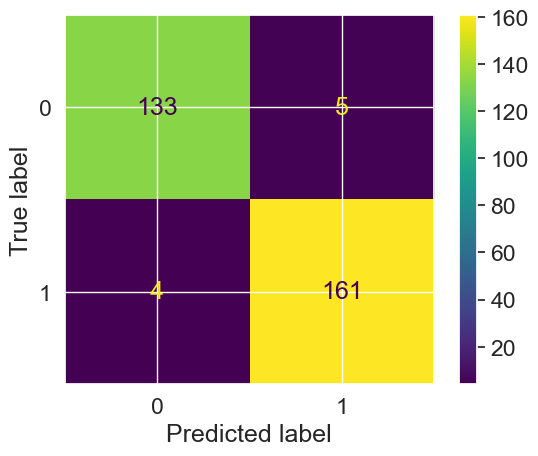

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=model, X=x, y=y)

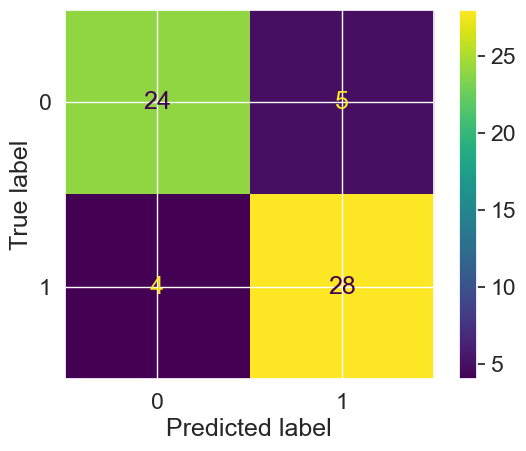

In [69]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                       y_pred = y_preds)

Mean Squared Error: 0.0
Predictions: [300000.]


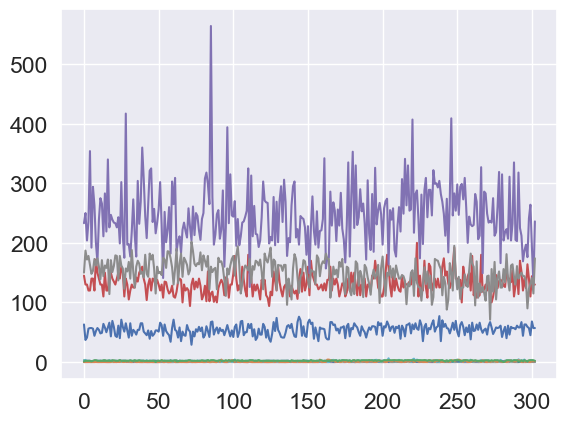

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating a simple dataset
data = pd.DataFrame({
    'Size': [1000, 1500, 2000, 2500, 3000],
    'Price': [200000, 250000, 300000, 350000, 400000]
})

# Features and target variable
X = data[['Size']]
y = data['Price']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Showing predictions
print("Predictions:", y_pred)
plt.plot(x)